Dataset Loaded Successfully:

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9

User-defined Linear Regression
Slope (m): 0.056872789574364764
Intercept (b): 8.069507475882542
R² Score (Manual): 0.8317762319587997


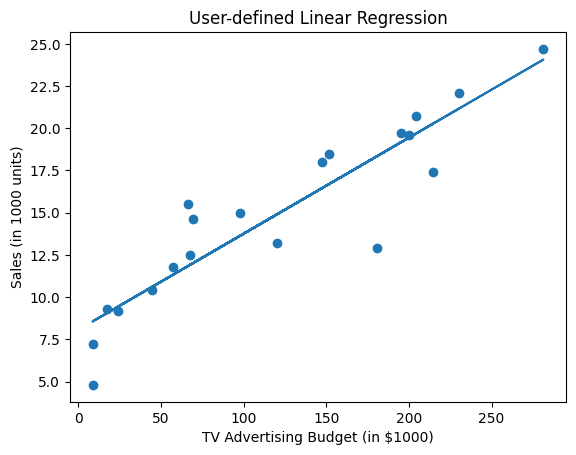


Scikit-learn Linear Regression
Slope (m): 0.05687278957436487
Intercept (b): 8.069507475882528
R² Score (sklearn): 0.8317762319587998

Comparison of Both Methods
Manual Slope vs Sklearn Slope: 0.056872789574364764  vs  0.05687278957436487
Manual Intercept vs Sklearn:   8.069507475882542  vs  8.069507475882528
Manual R² vs Sklearn R²:       0.8317762319587997  vs  0.8317762319587998


In [1]:
# ============================================================
#   Ex No: 8  –  Implementation of Linear Regression
#   FULL CODE WITH BUILT-IN DATASET (NO CSV REQUIRED)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ------------------------------------------------------------
# 1. Built-in Dataset (Advertising Data)
# ------------------------------------------------------------

data = {
    "TV": [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8,
           66.1, 214.7, 23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3],
    "Sales": [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 19.6,
              15.5, 17.4, 9.2, 15.0, 20.7, 19.7, 12.5, 24.7, 14.6, 18.0]
}

df = pd.DataFrame(data)
print("Dataset Loaded Successfully:\n")
print(df.head())

# ------------------------------------------------------------
# 2. Extract X and Y
# ------------------------------------------------------------

X = df['TV'].values
Y = df['Sales'].values
n = len(X)

# ------------------------------------------------------------
# 3. User-Defined (Mathematical) Linear Regression
# ------------------------------------------------------------

sum_x = np.sum(X)
sum_y = np.sum(Y)
sum_xy = np.sum(X * Y)
sum_x2 = np.sum(X * X)

# slope (m)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - (sum_x ** 2))

# intercept (b)
b = (sum_y - m * sum_x) / n

print("\n===============================")
print("User-defined Linear Regression")
print("===============================")
print("Slope (m):", m)
print("Intercept (b):", b)

# Predictions
Y_pred_manual = m * X + b

# R^2 calculation
SS_res = np.sum((Y - Y_pred_manual) ** 2)
SS_tot = np.sum((Y - np.mean(Y)) ** 2)

r2_manual = 1 - (SS_res / SS_tot)

print("R² Score (Manual):", r2_manual)

# ------------------------------------------------------------
# 4. Plot Scatter + Regression Line
# ------------------------------------------------------------

plt.scatter(X, Y)
plt.plot(X, Y_pred_manual)
plt.xlabel("TV Advertising Budget (in $1000)")
plt.ylabel("Sales (in 1000 units)")
plt.title("User-defined Linear Regression")
plt.show()

# ------------------------------------------------------------
# 5. Scikit-learn Linear Regression
# ------------------------------------------------------------

X_reshaped = X.reshape(-1, 1)

model = LinearRegression()
model.fit(X_reshaped, Y)

Y_pred_sklearn = model.predict(X_reshaped)

print("\n===============================")
print("Scikit-learn Linear Regression")
print("===============================")
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)
print("R² Score (sklearn):", r2_score(Y, Y_pred_sklearn))

# ------------------------------------------------------------
# 6. Comparison
# ------------------------------------------------------------

print("\n===============================")
print("Comparison of Both Methods")
print("===============================")
print(f"Manual Slope vs Sklearn Slope: {m}  vs  {model.coef_[0]}")
print(f"Manual Intercept vs Sklearn:   {b}  vs  {model.intercept_}")
print(f"Manual R² vs Sklearn R²:       {r2_manual}  vs  {r2_score(Y, Y_pred_sklearn)}")
